## Analyze Sweep Results

Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
FILENAME = "vit.csv"

Top 5 Multitask Runs

In [5]:
df = pd.read_csv(FILENAME)
df = df.dropna(subset=["val_dice", "val_auc", "val_loss"]).assign(score=lambda x: x["val_dice"] + x["val_auc"] - x["val_loss"]).sort_values("score", ascending=False)
top_5 = df.head(5).reset_index(drop=True)
# print(top_5[["Name", "val_dice", "val_iou", "val_auc", "val_loss", "score", "batch_size", "alpha", "beta", "dropout", "l2_reg"]])
print(df[["Name", "val_dice", "val_iou", "val_auc", "val_loss", "score", "batch_size", "alpha", "beta", "dropout", "l2_reg"]])

              Name  val_dice   val_iou   val_auc  val_loss     score  \
2  hopeful-sweep-4  0.592870  0.421791  0.489947  1.379635 -0.296818   
4   upbeat-sweep-2  0.599065  0.427678  0.501029  1.615846 -0.515751   
0   frosty-sweep-6  0.608278  0.437105  0.491275  1.918594 -0.819041   
3    drawn-sweep-3  0.600047  0.428706  0.475948  1.952045 -0.876050   
1    tough-sweep-5  0.601560  0.430540  0.490077  1.994976 -0.903340   

   batch_size  alpha  beta   dropout    l2_reg  
2          16    1.0   0.5  0.242734  0.000079  
4          16    0.5   2.0  0.244075  0.000105  
0          16    1.0   0.5  0.241781  0.000075  
3          64    0.5   0.5  0.165753  0.000047  
1          64    0.5   0.5  0.232696  0.000045  


Visualize All Runs

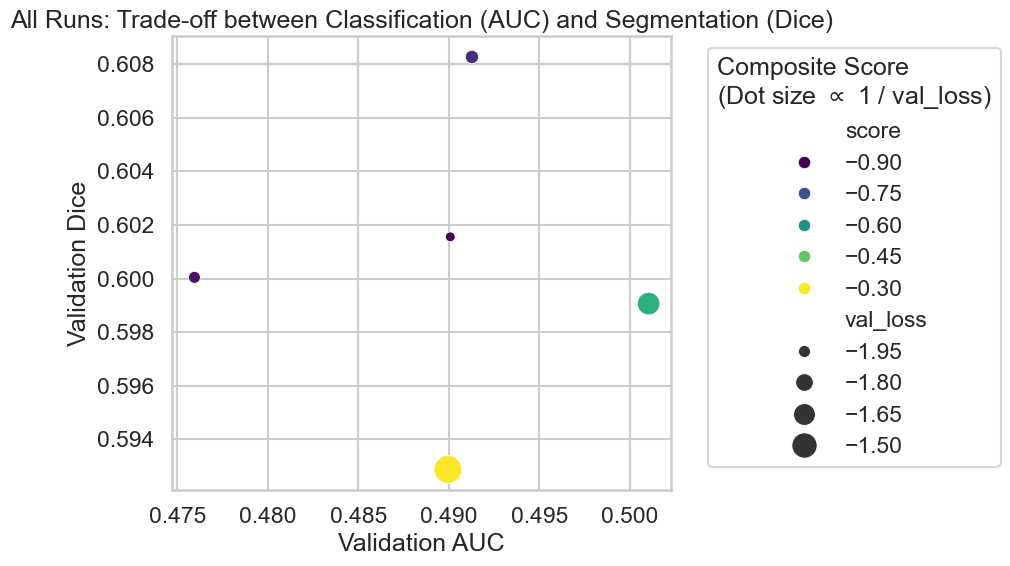

In [6]:
# Set seaborn style
sns.set(style="whitegrid", context="talk")

# Create the plot
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=df,
    x="val_auc",
    y="val_dice",
    size=-df["val_loss"],         # Inverse of loss (larger = better)
    hue="score",                        # Color by score
    palette="viridis",
    sizes=(50, 400),
    legend="brief",                     # Compact legend
    marker="o"                          # Use dot
)

# Axis labels and title
plt.title("All Runs: Trade-off between Classification (AUC) and Segmentation (Dice)")
plt.xlabel("Validation AUC")
plt.ylabel("Validation Dice")

# Update legend title only (combine info)
scatter.legend(
    # title="Composite Score\n(Dot size \u221D 1 / val_loss)",
    title=f"Composite Score\n(Dot size $\propto$ 1 / val_loss)",
    bbox_to_anchor=(1.05, 1),
    loc="upper left"
)

# Finalize
plt.grid(True)
plt.tight_layout()
plt.show()

Scatter plot

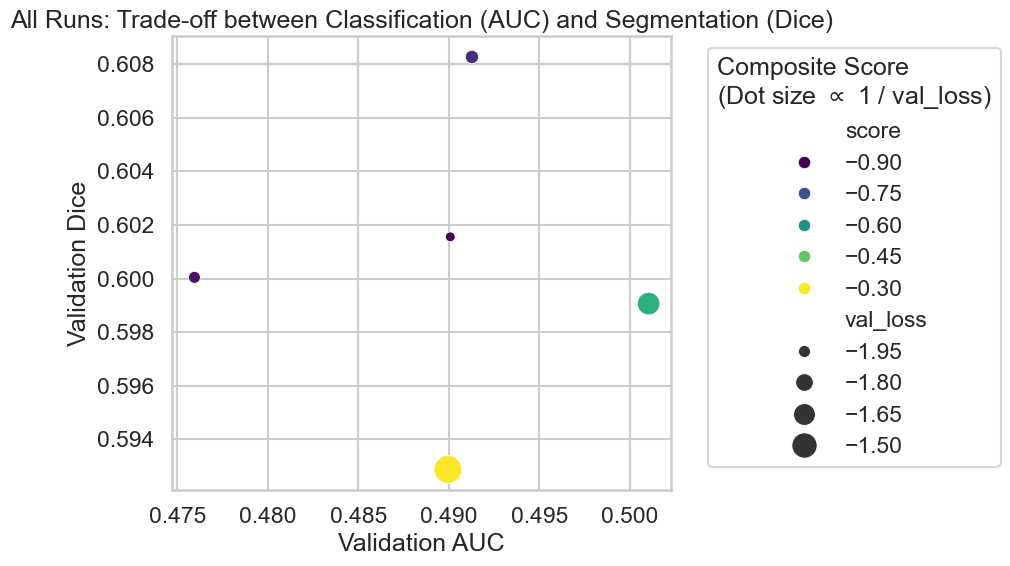

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load sweep results CSV
df = pd.read_csv(FILENAME)

# Filter valid runs
df = df.dropna(subset=["val_dice", "val_auc", "val_loss"]).copy()

# Compute composite score
df["score"] = df["val_dice"] + df["val_auc"] - df["val_loss"]

# Set seaborn style
sns.set(style="whitegrid", context="talk")

# Create the plot
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=df,
    x="val_auc",
    y="val_dice",
    size=-df["val_loss"],         # Inverse of loss (larger = better)
    hue="score",                        # Color by score
    palette="viridis",
    sizes=(50, 400),
    legend="brief",                     # Compact legend
    marker="o"                          # Use dot
)

# Axis labels and title
plt.title("All Runs: Trade-off between Classification (AUC) and Segmentation (Dice)")
plt.xlabel("Validation AUC")
plt.ylabel("Validation Dice")

# Update legend title only (combine info)
scatter.legend(
    # title="Composite Score\n(Dot size \u221D 1 / val_loss)",
    title=f"Composite Score\n(Dot size $\propto$ 1 / val_loss)",
    bbox_to_anchor=(1.05, 1),
    loc="upper left"
)

# Finalize
plt.grid(True)
plt.tight_layout()
plt.show()